<a href="https://colab.research.google.com/github/SWHulbert/TDA-Project/blob/master/TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install ripser
!pip install persim
!git clone https://github.com/SWHulbert/TDA-Project.git
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
from scipy import ndimage
import PIL
from persim import plot_diagrams
from ripser import ripser, lower_star_img

In [0]:
dataO = np.genfromtxt('/content/TDA-Project/letters.csv', dtype=int, delimiter=',', skip_header=0) # dataOriginal
dataT = np.genfromtxt('/content/TDA-Project/letters.csv', dtype=int, delimiter=',', skip_header=0) # dataTest
dataTBackup = np.genfromtxt('/content/TDA-Project/letters.csv', dtype=int, delimiter=',', skip_header=0) # Copy of dataTest just in case things go wrong

# Scanning functions
# Currently these functions take an int from 0-31, this a should be renamed to letterIndex

matrix = np.full((10, 10), 100)

# Left to Right Scan
def LRScan(a, data=dataO):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): # range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      matrix[row, column]=column # for scanning left to right
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
    
# Right to Left Scan
def RLScan(a, data=dataO):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): # range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      matrix[row,column]=9-column # for scanning right to left
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

# Top to Bottom Scan
def TBScan(a, data=dataO):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): #range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      matrix[row, column]=row
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
  
# Bottom to Top Scan
def BTScan(a, data=dataO):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): #range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = (int((k-1)/10))
      column = ((k-1)%10)
      matrix[row, column]=(9-row)
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
  
# Diagonal Bottom-Right to Top-Left Scan
def diagBRTL(a, data=dataO):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:]
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = ((10-i) + (10 - j))
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm
  

# Diagonal Top-Left to Bottom-Right Scan
def diagTLBR(a, data=dataO):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:] # Make this matrix?
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = i + j
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm


# Diagonal Bottom-Left to Top-Right Scan
def diagBLTR(a, data=dataO):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:]
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = (10-i)+j
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm


# Diagonal Top-Right to Bottom-Left Scan
def diagTRBL(a, data=dataO):
  letters = data.copy()[int(a)][:]
  letters1 = letters[1:]
  letters1 = letters1.reshape(10,10)
  for i in range(0,10):
        for j in range(0,10):
            if letters1[i][j] == 1:
                letters1[i][j] = (10-j)+i
            else:
                letters1[i][j]=100
  dgm = lower_star_img(letters1)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

# Minesweeper Scan
def MScan(a, data=dataO):
  global matrix
  matrix = np.full((10, 10), 100)
  letters = data.copy()[int(a)][:]
  for k in range(1, 101): # range(1, 101) goes from 1 to 100
    if letters[k] == 1:
      row = int((k-1)/10)
      column = (k-1)%10
      sum = -1
      for xOffset in range(-1, 2):
         for yOffset in range(-1, 2):
            n = (row + xOffset) * 10 + (column + yOffset) + 1
            if (row + xOffset) >= 0 and (row + xOffset) < 10 and (column + yOffset) >= 0 and (column + yOffset) < 10:
              if letters[n] == 1 and n > 0:
                sum += 1
      matrix[row, column] = sum
  dgm = lower_star_img(matrix)
  for i in dgm:
    for x in range(0, 2):
      if i[x] == float('inf'):
        i[x] = 100
  return dgm

In [0]:
# This function scans data, then calculates the total number of classes and the average length of the class
# It then records these 2 values in a dictionary with a key matching the respective scan
# These dictionaries then all get appended into a list, thus listIndex == letterIndex


def loadResults(data):
  scanResults = []
  for td in xrange(len(data)):
    tempDict = {}
    tempResult = np.array(BTScan(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['bt'] = (resultLen, resultAvg)
    
    tempResult = np.array(TBScan(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['tb'] = (resultLen, resultAvg)
    
    tempResult = np.array(LRScan(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['lr'] = (resultLen, resultAvg)
    
    tempResult = np.array(RLScan(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['rl'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagTLBR(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagTLBR'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagBRTL(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagBRTL'] = (resultLen, resultAvg)
    
    tempResult = np.array(MScan(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['m'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagTRBL(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagTRBL'] = (resultLen, resultAvg)
    
    tempResult = np.array(diagBLTR(td, data))
    resultLen = tempResult.shape[0]
    sum = 0
    for i in xrange(resultLen):
      sum += tempResult[i][1]-tempResult[i][0]
    resultAvg = sum*1.0/resultLen*1.0
    tempDict['diagBLTR'] = (resultLen, resultAvg)
    scanResults.append(tempDict)
  return scanResults

# These result lists have the values for all indices in dataO and dataT
resultListO = loadResults(data=dataO) # resultListOriginal
resultListT = loadResults(data=dataT) # resultListTest

In [0]:
# Below are a bunch of function that act on our list of dictionary values above


# Calculate distance between letterIndex = x and letterIndex = y
def vectorDistance(x, y):
  sum = 0.0
  for a in xrange(len(resultListO[x])):
    sum += (resultListO[x].values()[a][0] - resultListT[y].values()[a][0])**2 + (resultListO[x].values()[a][1] - resultListT[y].values()[a][1])**2
    dist = sum ** 0.5
  return dist


# Take a letterIndex = y from dataT, matches it with values stored in resultListO
# Returns a 3-tuple, with the original letterIndex, the guess letterIndex, and the distance between them
def guess(y):
  distList = []
  for j in range(0,32):
    distList.append(vectorDistance(j,y))
    guessLetter = min(distList)
  return (y, distList.index(guessLetter), guessLetter)


# This noise function flips bits (from 0 to 1, or from 1 to 0) in dataT with noisePercent = b
# b should be renamed to noisePercent
def noise(b=0.04):
  for k in dataT:
    for i in range(len(k)):
      if i > 0 and rnd.random() < b:
        k[i] = 1 - k[i]

        
# denoiser NEEDS TO BE FIXED
def denoiser():
  global dataT
  data = dataT.copy()
  for a in range(32):
    letters = data[int(a)][:]
    for k in range(len(letters)):
      if letters[k] == 1 and k > 0:
        if k < 11:
          if k%10 == 1:
            sum = letters[k+1] + letters[k+10] + [k+11]
          elif k%10 == 0:
            sum = letters[k-1] + letters[k+10] + letters[k+9]
          else:
            sum = letters[k-1] + letters[k+1] + letters[k+9] + letters[k+10] + letters[k+11]
        elif k > 90:
          if k%10 == 1:
            sum = letters[k+1] + letters[k-9] + letters[k-10]
          elif k%10 == 0:
            sum = letters[k-1] + letters[k-10] + letters[k-11]
          else:
            sum = letters[k-1] + letters[k+1] + letters[k-9] + letters[k-10] + letters[k-11]
        else:
          if k%10 == 1:
            sum = letters[k+1] + letters[k-9] + letters[k-10] + letters[k+10] + letters[k+11]
          elif k%10 == 0:
            sum = letters[k-1] + letters[k-10] + letters[k-11] + letters[k+9] + letters[k+10]
          else:
            sum = letters[k-1] + letters[k+1] + letters[k-9] + letters[k-10] + letters[k-11] + letters[k+9] + letters[k+10] + letters[k+11]
        if (sum == 0):
          letters[k] = 0
  dataT = data
  return dataT


# correctCheck takes a letterIndex = a, and a noisePercent = b
# It then guesses what letterIndex = a is after it's been through the noise
# It returns a 2-tuple with values (letterIndex = a, guessLetter)
# It only exists to be used in conjunction with perCorrect function
def correctCheck(a, b=0.04, denoise=True):
  global resultListT
  global dataT
  dataT = np.genfromtxt('/content/TDA-Project/letters.csv', dtype=int, delimiter=',', skip_header=0)
  noise(b)
  if denoise:
    denoiser()
  resultListT = loadResults(data=dataT)
  check = guess(a)
  #print(check[0], check[1])   # Uncomment this line if you want to see predictions for perCorrect below
  return(check[0], check[1])


# perCorrect calculates the percent Correct guessed for letterIndex = a, noisePercent = b, and totalGuesses = c
# It then returns a simple percentage, (total # correct)/(totalGuesses)
def perCorrect(a, b=0.04, c=10, denoise=True):
  checkList = []
  sum = 0.0
  for i in range(c):
    checkList.append(correctCheck(a, b, denoise))
  for k in checkList:
    if k[0] == k[1]:
      sum += 1    
  return float((sum/c))


# Try for yourself! This will give you the percent Correct guessed for all letters in the alphabet
# With noisePercent = .04, totalGuesses = 10
# This function may take a minute to run
'''WARNING:
DO NOT MAKE TOTALGUESSES TOO BIG'''
#for y in range(26):
  #print(y, perCorrect(y, 0.04, 100))
  


# It is important to note that everytime you run this function, it re-noises
# So if you run it twice in a row you'll get a slight variance in % correct

'WARNING:\nDO NOT MAKE TOTALGUESSES TOO BIG'

[[  1 100 100 100 100   3 100 100 100 100]
 [100   2   2   2   3   3   3   1 100 100]
 [100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100   1 100 100 100 100 100]
 [100 100 100 100   2 100 100 100 100 100]
 [100 100 100 100   2 100 100 100 100 100]
 [100 100 100 100   2 100 100 100 100 100]
 [100 100 100 100   2 100 100 100 100 100]
 [100 100 100 100   1 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


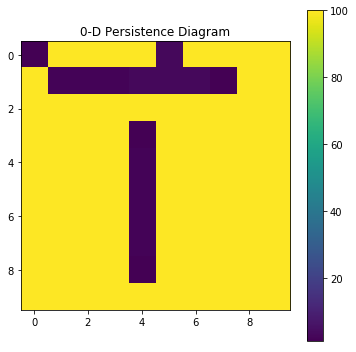

In [0]:
# Below here is just plotting stuff, if something is commented out its to keep things clean in the output


#dataT = np.genfromtxt('/content/TDA-Project/letters.csv', dtype=int, delimiter=',', skip_header=0)
#noise(0.04)
x = 19

denoiser()
MScan(x, data=dataT)
print(matrix)
dgm = lower_star_img(matrix)
#should print letters1 for diagonal matrix

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(matrix)
plt.colorbar()
plt.title('Test Image')
#plt.subplot(122)
#plot_diagrams(dgm)
plt.title('0-D Persistence Diagram')
plt.tight_layout()
plt.show()

In [0]:
# Possible future stuff

''' To Do List:
Add better comments and explanation to the code
Change variable names to better represent what they are instead of using letters
More Scans(?)/More unique Scans/Better Measurements
General optimization to guess better
Denoising possible
Check scans for highest perCorrect and optimize'''


denoiser()

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0],
       [ 3,  1,  0, ...,  0,  0,  0],
       ...,
       [30,  0,  0, ...,  0,  0,  0],
       [31,  0,  0, ...,  0,  0,  0],
       [32,  0,  0, ...,  0,  0,  0]])

In [0]:
for y in range(26):
  print(y, perCorrect(y, 0.04, 50))

(0, 0.3)
(1, 0.4)
(2, 0.26)
(3, 0.14)
(4, 0.48)
(5, 0.38)
(6, 0.42)
(7, 0.56)
(8, 0.58)
(9, 0.68)
(10, 0.68)


In [0]:
for y in range(26):
  print(y, perCorrect(y, 0.04, 50, denoise=False))

0.52

In [0]:
len(dataT)

32

In [0]:
MScan(19)

array([[  1.,   3.],
       [  1.,   4.],
       [  1., 100.]])